<a href="https://colab.research.google.com/github/Imama-Kainat/ByteWise-MLDL/blob/main/CrimeLostAngles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Instructions LosAngles Crime

https://drive.google.com/drive/folders/1h5C4n5JKhMtWlcdKCF6tjawnVF0BWC2S
Explore the crimes.csv dataset and use your findings to answer the following questions:

Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
#date rptd or date occ ko parse krdo as a date take ispr date ke operation ho ske or time occ ko string me krdo
data = pd.read_csv('/content/DATA.csv', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})
print(data.head())



       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0   10304468 2020-01-08 2020-01-08     2230    Southwest   
1  190101086 2020-01-02 2020-01-01      330      Central   
2  200110444 2020-04-14 2020-02-13     1200      Central   
3  191501505 2020-01-01 2020-01-01     1730  N Hollywood   
4  191921269 2020-01-01 2020-01-01      415      Mission   

                                         Crm Cd Desc  Vict Age Vict Sex  \
0                           BATTERY - SIMPLE ASSAULT        36        F   
1                           BATTERY - SIMPLE ASSAULT        25        M   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0        X   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   

  Vict Descent                                     Weapon Desc   Status Desc  \
0            B  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Adult Other   
1            H              

<ipython-input-4-ca9587040f31>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/DATA.csv', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})
<ipython-input-4-ca9587040f31>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/DATA.csv', parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC': str})


In [5]:
# Extract the hour from the 'TIME OCC' column
# aik naya column hour occ bnate he timeocc ke pehle 2 index string ko int me convert krke
data['HOUR OCC'] = data['TIME OCC'].str[:2].astype(int)

# for checking the new data frama
print(data.head())



       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0   10304468 2020-01-08 2020-01-08     2230    Southwest   
1  190101086 2020-01-02 2020-01-01      330      Central   
2  200110444 2020-04-14 2020-02-13     1200      Central   
3  191501505 2020-01-01 2020-01-01     1730  N Hollywood   
4  191921269 2020-01-01 2020-01-01      415      Mission   

                                         Crm Cd Desc  Vict Age Vict Sex  \
0                           BATTERY - SIMPLE ASSAULT        36        F   
1                           BATTERY - SIMPLE ASSAULT        25        M   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0        X   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   

  Vict Descent                                     Weapon Desc   Status Desc  \
0            B  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Adult Other   
1            H              

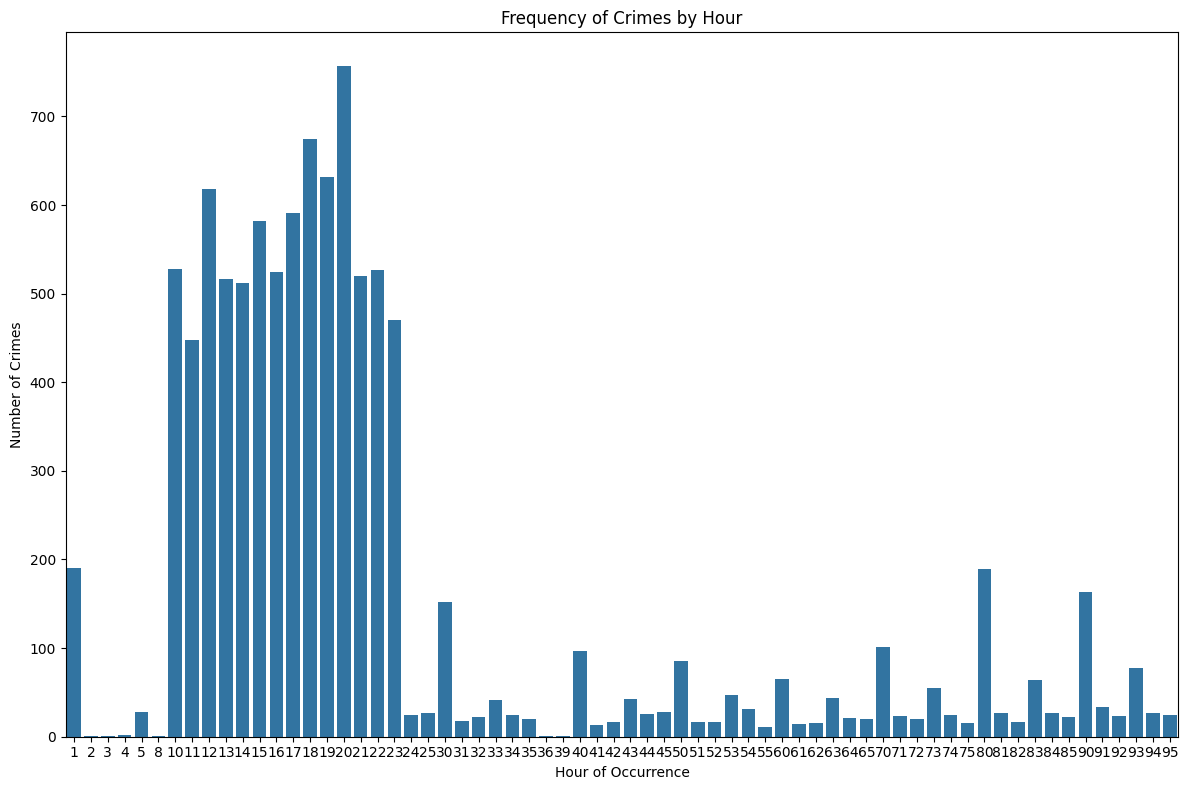

In [11]:
plt.figure(figsize=(12, 8))  # Increase figure size for more space
sns.countplot(data=data, x='HOUR OCC')

# Set title and labels
plt.title('Frequency of Crimes by Hour')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Number of Crimes')


# Adjust layout to ensure labels fit well
#Automatically adjusts the spacing of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [12]:
# Find the peak crime hour
peak_crime_hour = data['HOUR OCC'].mode()[0]
#mode() series return krta he uska jo phla index element hoja wo peak value ho g
print(f"The hour with the highest frequency of crimes is {peak_crime_hour}")



The hour with the highest frequency of crimes is 20


        DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0    10304468 2020-01-08 2020-01-08     2230    Southwest   
10  200100509 2020-01-04 2020-01-04     2200      Central   
23  211014725 2021-11-18 2020-12-28        1  West Valley   
57  200104033 2020-01-01 2020-01-01      230      Central   
58  200811087 2020-06-24 2020-06-23     2200      West LA   

                          Crm Cd Desc  Vict Age Vict Sex Vict Descent  \
0            BATTERY - SIMPLE ASSAULT        36        F            B   
10              BURGLARY FROM VEHICLE        29        M            A   
23                  THEFT OF IDENTITY        46        F            W   
57  INTIMATE PARTNER - SIMPLE ASSAULT        25        M            W   
58           BATTERY - SIMPLE ASSAULT        24        M            W   

                                       Weapon Desc  Status Desc  \
0   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Other   
10                              ROCK/THROWN OBJECT  Invest C

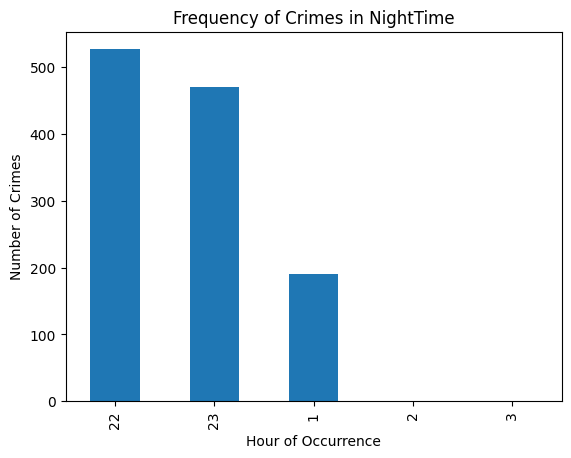

In [15]:
# Filter for the night-time hours (10pm to 3:59am)
night_time = data[data['HOUR OCC'].isin([22, 23, 0, 1, 2, 3])]
#isin() function checks if each value in the 'HOUR OCC' column is in the specified list [22, 23, 0, 1, 2, 3]
# ye night_time ka aik set bnaye ga jis me 10-4 baje tak ka data hoja
print(night_time.head())
night_time['HOUR OCC'].value_counts().plot(kind='bar')
# Set title and labels
plt.title('Frequency of Crimes in NightTime')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Number of Crimes')

# Display the plot
plt.show()

In [16]:
# Group by 'AREA NAME' and count occurrences, find the area with the highest night-time crimes
peak_night_crime_location = night_time.groupby('AREA NAME', as_index=False)['DR_NO'].count().sort_values('DR_NO', ascending=False).iloc[0]['AREA NAME']
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")
# sab se pehla group bnte the nighttime crime ke for area name uskebad drno jo ke identifier he crime ke unke count ki basis pr sorting ki jati he decending order me
# aik new data fram peak-night-crime-location bnta he .iloc[0]se uski first row  ka area name nikala jata he


The area with the largest volume of night crime is Harbor


In [17]:
# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

#pd.cut(): This function is used to segment and
#  sort data values into discrete bins. It categorizes each value in the specified column into one of the defined bins.

# Create a new column for age brackets
data['Age Bracket'] = pd.cut(data['Vict Age'], bins=age_bins, labels=age_labels)
data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,22,35-44
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,33,18-25
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST,12,NaN
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL,17,65+
4,191921269,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST,41,26-34


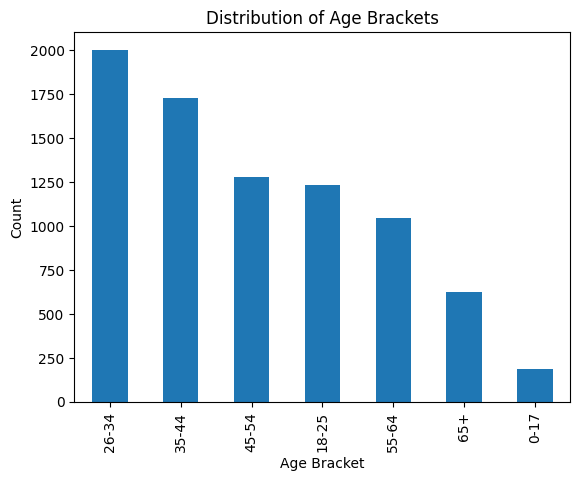

In [18]:
data['Age Bracket'].value_counts().plot(kind='bar')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.title('Distribution of Age Brackets')
plt.show() # Display the plot


In [19]:
# Count occurrences of each age bracket
victim_ages = data['Age Bracket'].value_counts().sort_index()

# Print the victim age distribution
print(victim_ages)



Age Bracket
0-17      187
18-25    1232
26-34    2004
35-44    1730
45-54    1276
55-64    1043
65+       626
Name: count, dtype: int64


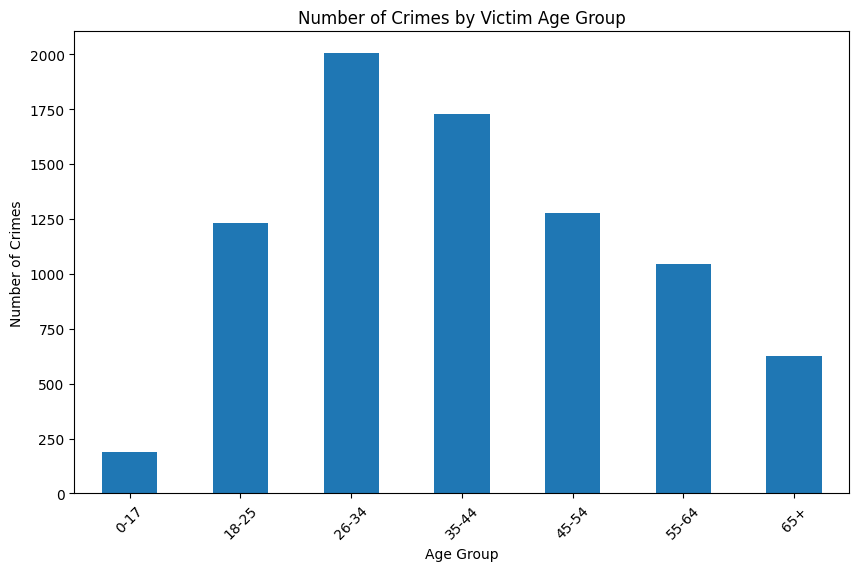

In [20]:
# Plot the distribution of crimes by victim age group
plt.figure(figsize=(10, 6))
victim_ages.plot(kind='bar')
plt.title('Number of Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x1000 with 0 Axes>

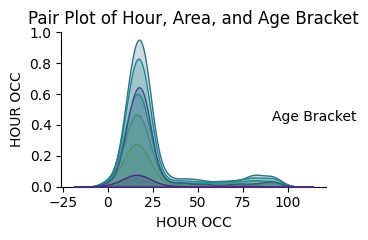

In [25]:
# Prepare a subset of the data for pair plot
subset_data = data[['HOUR OCC', 'AREA NAME', 'Age Bracket']]

plt.figure(figsize=(12, 10))
sns.pairplot(subset_data, hue='Age Bracket', palette='viridis')
plt.title('Pair Plot of Hour, Area, and Age Bracket')
plt.tight_layout()
plt.show()
